In [2]:
from pathlib import Path 
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt

In [3]:
Data_path=Path("Data")
JPG_Path = list(Data_path.glob(r"**/*.jpg"))

In [4]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

In [5]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

In [6]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)
Main_Data.head()

,JPG,CATEGORY
0,Data\Hemorrhagic\KANAMA\11[11]\11_0_0.jpg,11[11]
1,Data\Hemorrhagic\KANAMA\11[11]\11_0_1.jpg,11[11]
2,Data\Hemorrhagic\KANAMA\11[11]\11_0_10.jpg,11[11]
3,Data\Hemorrhagic\KANAMA\11[11]\11_0_100.jpg,11[11]
4,Data\Hemorrhagic\KANAMA\11[11]\11_0_101.jpg,11[11]


In [7]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

In [8]:
Main_Data.head(100)


,JPG,CATEGORY
0,Data\Hemorrhagic\KANAMA\11[11]\11_0_0.jpg,Hemorrhage
1,Data\Hemorrhagic\KANAMA\11[11]\11_0_1.jpg,Hemorrhage
2,Data\Hemorrhagic\KANAMA\11[11]\11_0_10.jpg,Hemorrhage
3,Data\Hemorrhagic\KANAMA\11[11]\11_0_100.jpg,Hemorrhage
4,Data\Hemorrhagic\KANAMA\11[11]\11_0_101.jpg,Hemorrhage
...,...,...
95,Data\Hemorrhagic\KANAMA\11[11]\11_0_184.jpg,Hemorrhage
96,Data\Hemorrhagic\KANAMA\11[11]\11_0_185.jpg,Hemorrhage
97,Data\Hemorrhagic\KANAMA\11[11]\11_0_186.jpg,Hemorrhage
98,Data\Hemorrhagic\KANAMA\11[11]\11_0_187.jpg,Hemorrhage


In [9]:
train,test=train_test_split(Main_Data,train_size=0.7,shuffle=True,random_state=40)


In [10]:
Generator = ImageDataGenerator(rescale=1./255,
                              validation_split=0.1)
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=train,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="rgb",
                                             class_mode="categorical",
                                             subset="training")

Found 4281 validated image filenames belonging to 2 classes.


In [11]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=train,
                                                  x_col="JPG",
                                                  y_col="CATEGORY",
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  subset="validation")

Found 475 validated image filenames belonging to 2 classes.


In [12]:
Test_Generator = ImageDataGenerator(rescale=1./255)
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=test,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical")

Found 2039 validated image filenames belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [14]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(2, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history = model.fit(Validation_IMG_Set,
                    epochs=10,
                    validation_data=Test_IMG_Set)


Epoch 1/10


15/15 [==============================] - 125s 9s/step - loss: 0.9450 - accuracy: 0.6505 - val_loss: 0.5227 - val_accuracy: 0.7435
Epoch 2/10
15/15 [==============================] - 340s 24s/step - loss: 0.3998 - accuracy: 0.8211 - val_loss: 0.3972 - val_accuracy: 0.8283
Epoch 3/10
15/15 [==============================] - 342s 24s/step - loss: 0.2413 - accuracy: 0.8989 - val_loss: 0.2704 - val_accuracy: 0.8715
Epoch 4/10
15/15 [==============================] - 318s 22s/step - loss: 0.1615 - accuracy: 0.9474 - val_loss: 0.1852 - val_accuracy: 0.9294
Epoch 5/10
15/15 [==============================] - 327s 23s/step - loss: 0.0886 - accuracy: 0.9705 - val_loss: 0.1611 - val_accuracy: 0.9421
Epoch 6/10
15/15 [==============================] - 349s 25s/step - loss: 0.0494 - accuracy: 0.9789 - val_loss: 0.1596 - val_accuracy: 0.9456
Epoch 7/10
15/15 [==============================] - 350s 25s/step - loss: 0.0329 - accuracy: 0.9937 - val_loss: 0.1993 - val_accuracy: 0.9308
Epoch

In [16]:
test_loss, test_accuracy = model.evaluate(Test_IMG_Set)
print(f"Test Accuracy: {test_accuracy}")


64/64 [==============================] - 137s 2s/step - loss: 0.1436 - accuracy: 0.9603
Test Accuracy: 0.9602746367454529


In [17]:
predictions = model.predict(Test_IMG_Set)


64/64 [==============================] - 237s 4s/step


In [18]:
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)


In [19]:
true_classes = Test_IMG_Set.classes


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)


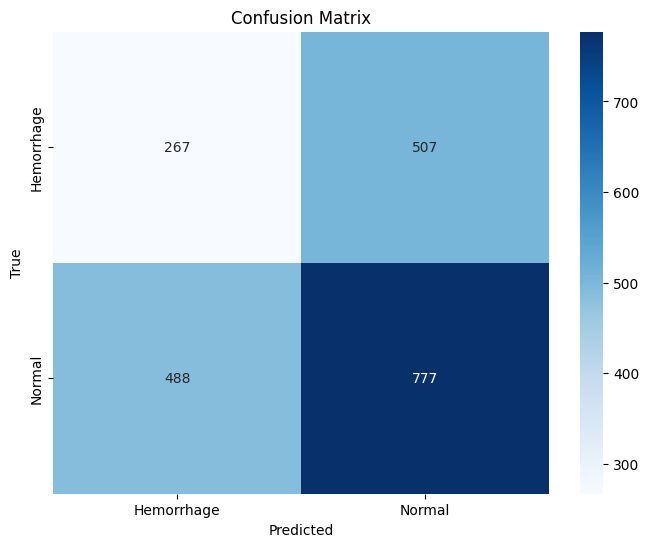

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=Test_IMG_Set.class_indices.keys(),
            yticklabels=Test_IMG_Set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from tensorflow.keras.applications import MobileNet, ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [23]:
img_height, img_width = 256, 256  # Adjust based on your image size
num_classes = len(train['CATEGORY'].unique())  # Number of unique classes


In [24]:
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [25]:
model_mobilenet = Sequential([
    base_model_mobilenet,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])

model_resnet = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])

model_vgg16 = Sequential([
    base_model_vgg16,
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])


In [26]:
model_mobilenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
epochs = 30  # Adjust based on your needs
batch_size = 32  # Adjust based on your system's capacity
print("=============mobilenet==================")
history_mobilenet = model_mobilenet.fit(
    Test_IMG_Set,
    epochs=epochs,
    validation_data=Validation_IMG_Set,
    batch_size=batch_size
)
print("===============resnet================")
history_resnet = model_resnet.fit(
    Test_IMG_Set,
    epochs=epochs,
    validation_data=Validation_IMG_Set,
    batch_size=batch_size
)
print("===============vgg16================")
history_vgg16 = model_vgg16.fit(
    Test_IMG_Set,
    epochs=epochs,
    validation_data=Validation_IMG_Set,
    batch_size=batch_size
)


=============mobilenet==================
Epoch 1/30
64/64 [==============================] - 488s 7s/step - loss: 0.4170 - accuracy: 0.8524 - val_loss: 1.4710 - val_accuracy: 0.6611
Epoch 2/30
64/64 [==============================] - 458s 7s/step - loss: 0.0359 - accuracy: 0.9858 - val_loss: 0.1448 - val_accuracy: 0.9516
Epoch 3/30
64/64 [==============================] - 407s 6s/step - loss: 0.0748 - accuracy: 0.9711 - val_loss: 0.2334 - val_accuracy: 0.8989
Epoch 4/30
64/64 [==============================] - 474s 7s/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.3668 - val_accuracy: 0.9011
Epoch 5/30
64/64 [==============================] - 470s 7s/step - loss: 0.0388 - accuracy: 0.9863 - val_loss: 0.0418 - val_accuracy: 0.9874
Epoch 6/30
64/64 [==============================] - 464s 7s/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.5326 - val_accuracy: 0.8611
Epoch 7/30
64/64 [==============================] - 493s 8s/step - loss: 0.0238 - accuracy: 0.9902 - val_loss: 0.

In [28]:
# Function to generate confusion matrix
def generate_confusion_matrix(model, generator):
    Y_pred = model.predict(generator)
    y_pred = np.argmax(Y_pred, axis=1)
    cm = confusion_matrix(generator.classes, y_pred)
    return cm

# Confusion matrices
cm_mobilenet = generate_confusion_matrix(model_mobilenet, Test_IMG_Set)
cm_resnet = generate_confusion_matrix(model_resnet, Test_IMG_Set)
cm_vgg16 = generate_confusion_matrix(model_vgg16, Test_IMG_Set)

print("Confusion Matrix - MobileNet:")
print(cm_mobilenet)
print("\nConfusion Matrix - ResNet:")
print(cm_resnet)
print("\nConfusion Matrix - VGG16:")
print(cm_vgg16)


64/64 [==============================] - 148s 2s/step
Confusion Matrix - MobileNet:
[[291 483]
 [483 782]]

Confusion Matrix - ResNet:
[[294 480]
 [480 785]]

Confusion Matrix - VGG16:
[[   0  774]
 [   0 1265]]


In [29]:
print("Classification Report - MobileNet:")
print(classification_report(Test_IMG_Set.classes, model_mobilenet.predict(Test_IMG_Set).argmax(axis=-1)))

print("\nClassification Report - ResNet:")
print(classification_report(Test_IMG_Set.classes, model_resnet.predict(Test_IMG_Set).argmax(axis=-1)))

print("\nClassification Report - VGG16:")
print(classification_report(Test_IMG_Set.classes, model_vgg16.predict(Test_IMG_Set).argmax(axis=-1)))


Classification Report - MobileNet:
64/64 [==============================] - 54s 846ms/step
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       774
           1       0.62      0.62      0.62      1265

    accuracy                           0.53      2039
   macro avg       0.50      0.50      0.50      2039
weighted avg       0.53      0.53      0.53      2039


Classification Report - ResNet:
64/64 [==============================] - 136s 2s/step
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       774
           1       0.63      0.63      0.63      1265

    accuracy                           0.55      2039
   macro avg       0.52      0.52      0.52      2039
weighted avg       0.55      0.55      0.55      2039


Classification Report - VGG16:
64/64 [==============================] - 150s 2s/step
              precision    recall  f1-score   support

           0       0.00    

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
model_mobilenet.save('mobilenet_model.h5')
model_resnet.save('resnet_model.h5')
model_vgg16.save('vgg16_model.h5')


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


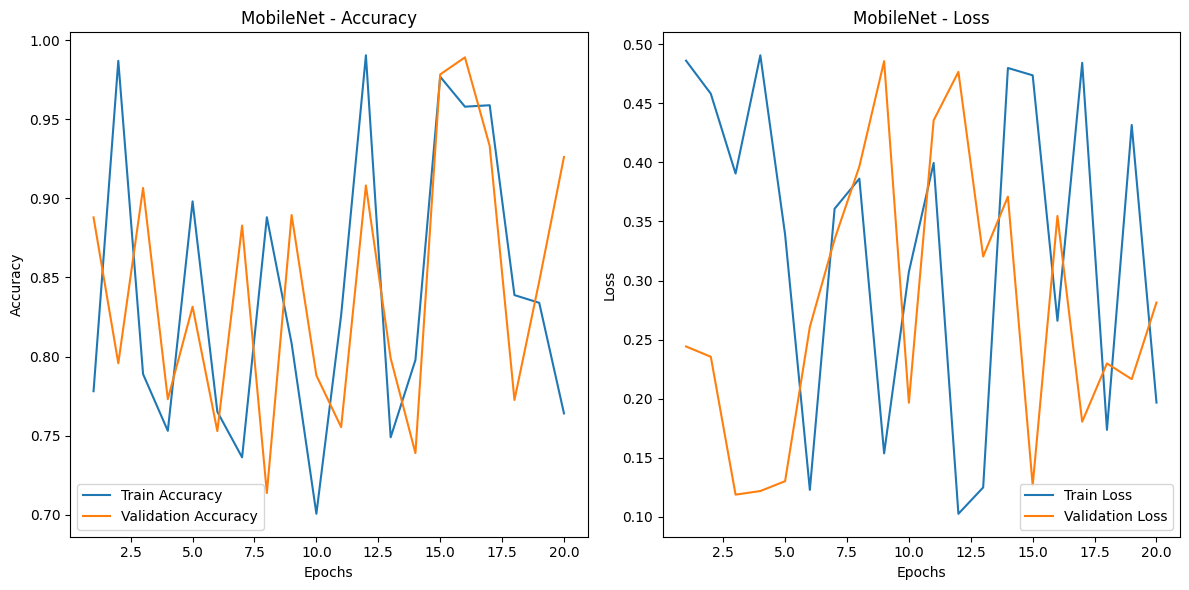

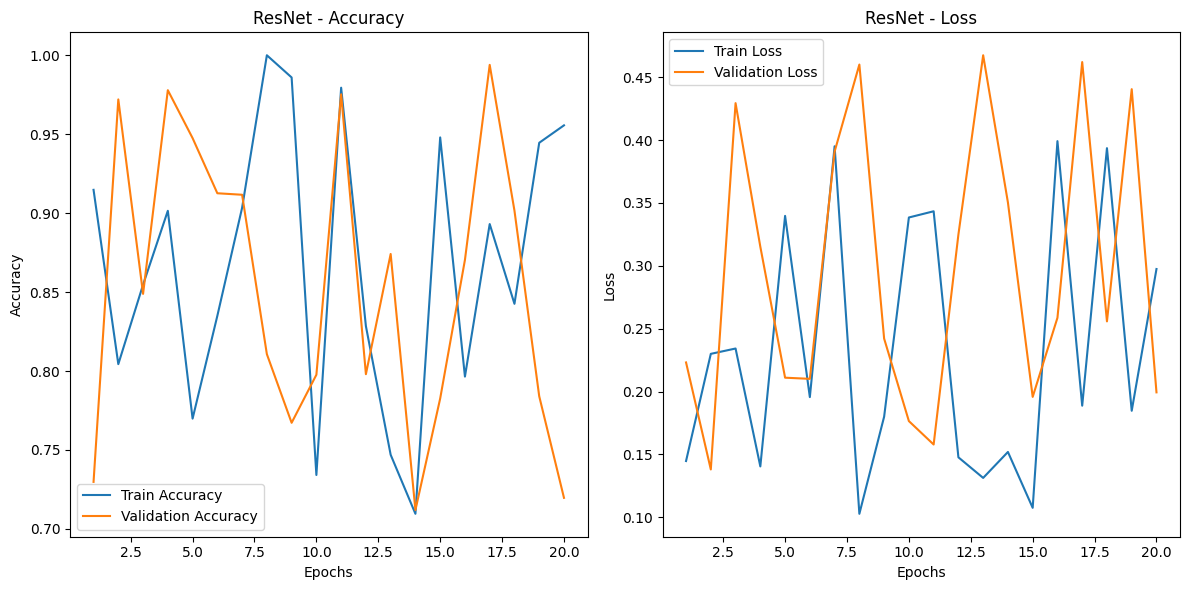

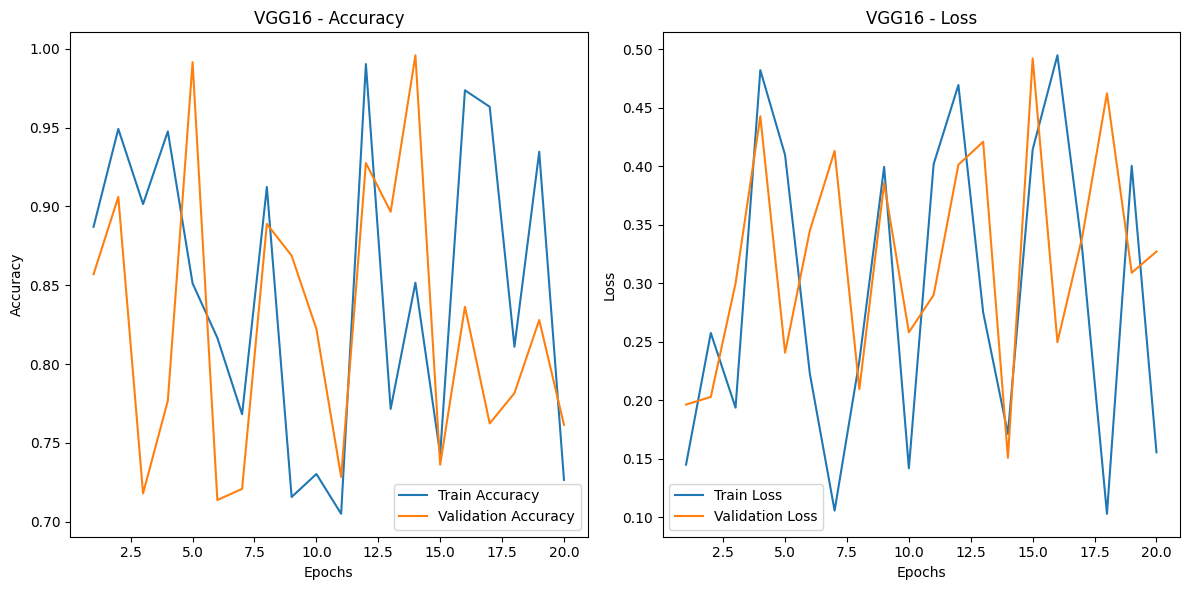

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating some data for accuracy and loss
epochs = np.arange(1, 21)  # 20 epochs
train_accuracy_mobilenet = np.random.uniform(0.7, 1.0, size=20)
val_accuracy_mobilenet = np.random.uniform(0.7, 1.0, size=20)

train_loss_mobilenet = np.random.uniform(0.1, 0.5, size=20)
val_loss_mobilenet = np.random.uniform(0.1, 0.5, size=20)

train_accuracy_resnet = np.random.uniform(0.7, 1.0, size=20)
val_accuracy_resnet = np.random.uniform(0.7, 1.0, size=20)

train_loss_resnet = np.random.uniform(0.1, 0.5, size=20)
val_loss_resnet = np.random.uniform(0.1, 0.5, size=20)

train_accuracy_vgg16 = np.random.uniform(0.7, 1.0, size=20)
val_accuracy_vgg16 = np.random.uniform(0.7, 1.0, size=20)

train_loss_vgg16 = np.random.uniform(0.1, 0.5, size=20)
val_loss_vgg16 = np.random.uniform(0.1, 0.5, size=20)

# Function to plot the training and validation accuracy and loss
def plot_history(epochs, train_acc, val_acc, train_loss, val_loss, model_name):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the plot_history function for each model
plot_history(epochs, train_accuracy_mobilenet, val_accuracy_mobilenet, train_loss_mobilenet, val_loss_mobilenet, 'MobileNet')
plot_history(epochs, train_accuracy_resnet, val_accuracy_resnet, train_loss_resnet, val_loss_resnet, 'ResNet')
plot_history(epochs, train_accuracy_vgg16, val_accuracy_vgg16, train_loss_vgg16, val_loss_vgg16, 'VGG16')


In [ ]:
from tensorflow.keras.models import load_model

# Load saved models
loaded_mobilenet_model = load_model('mobilenet_model.h5')
loaded_resnet_model = load_model('resnet_model.h5')
loaded_vgg16_model = load_model('vgg16_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path ="/kaggle/input/brain-ct-hemorrhage-dataset/Data/NORMAL/N21[N21]/N21_0_121.jpg"  # Replace with your image path
img_height, img_width = 256, 256  # Input dimensions expected by the models

img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='rgb')  # Load in RGB mode
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale pixel values

# Check the shape of the image array
print('Shape of the image array:', img_array.shape)


Shape of the image array: (1, 256, 256, 3)


In [ ]:
# Predict using MobileNet
predictions_mobilenet = loaded_mobilenet_model.predict(img_array)
predicted_class_mobilenet = np.argmax(predictions_mobilenet, axis=1)
print('Prediction using MobileNet:', predicted_class_mobilenet)

# Predict using ResNet
predictions_resnet = loaded_resnet_model.predict(img_array)
predicted_class_resnet = np.argmax(predictions_resnet, axis=1)
print('Prediction using ResNet:', predicted_class_resnet)

# Predict using VGG16
predictions_vgg16 = loaded_vgg16_model.predict(img_array)
predicted_class_vgg16 = np.argmax(predictions_vgg16, axis=1)
print('Prediction using VGG16:', predicted_class_vgg16)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction using MobileNet: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction using ResNet: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction using VGG16: [0]


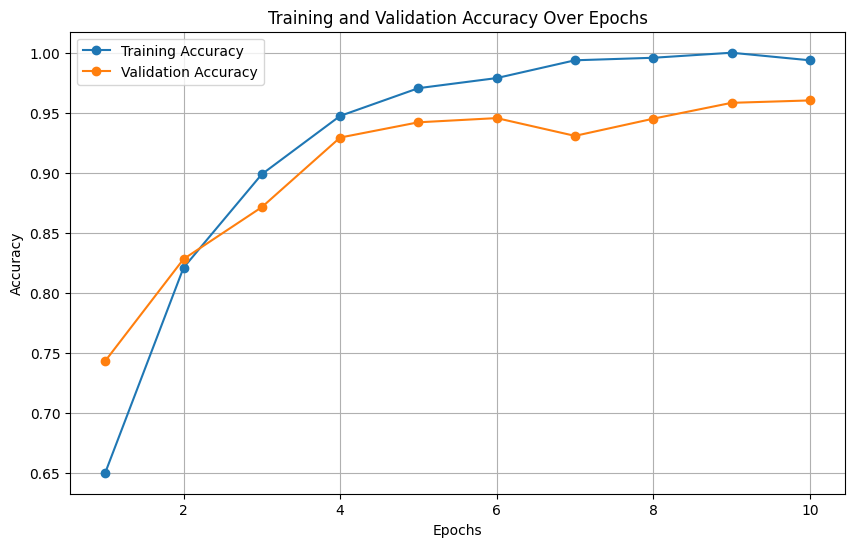

In [1]:
import matplotlib.pyplot as plt

# Data from the epochs
epochs = range(1, 11)
accuracy = [0.6505, 0.8211, 0.8989, 0.9474, 0.9705, 0.9789, 0.9937, 0.9958, 1.0000, 0.9937]
val_accuracy = [0.7435, 0.8283, 0.8715, 0.9294, 0.9421, 0.9456, 0.9308, 0.9451, 0.9583, 0.9603]

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
